# Create resaidual norm files for CREDIT

In [1]:
import os
import yaml
import copy
import numpy as np
import xarray as xr

In [2]:
from scipy.stats import gmean

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## File creation

### 6 hourly residual coeff

In [4]:
# get variable information from data_preprocessing/config
config_name = os.path.realpath('data_config_6h.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [5]:
N_levels = 16

In [6]:
# get variable names
varnames = list(conf['residual'].keys())
varnames = varnames[:-5] # remove save_loc and others

varname_surf = list(set(varnames) - set(['U', 'V', 'T', 'Q']))
varname_upper = ['U', 'V', 'T', 'Q']

# collect computed mean and variance values
# See "qsub_STEP01_compute_mean_std.ipynb"
MEAN_values = {}
STD_values = {}

for varname in varname_surf:
    save_name = conf['residual']['save_loc'] + '{}_mean_std_{}.npy'.format(conf['residual']['prefix'], varname)
    mean_std = np.load(save_name)
    MEAN_values[varname] = mean_std[0]
    STD_values[varname] = mean_std[1]

for varname in varname_upper:

    # -------------------------------------------- #
    # allocate all levels
    mean_std_all_levels = np.empty((2, N_levels))
    mean_std_all_levels[...] = np.nan
    
    for i_level in range(N_levels):
        save_name = conf['residual']['save_loc'] + '{}_level{}_mean_std_{}.npy'.format(conf['residual']['prefix'], i_level, varname)
        mean_std = np.load(save_name)
        mean_std_all_levels[:, i_level] = mean_std

    # -------------------------------------------- #
    # save
    MEAN_values[varname] = np.copy(mean_std_all_levels[0, :])
    STD_values[varname] = np.copy(mean_std_all_levels[1, :])

In [7]:
std_val_all = list(STD_values.values())
std_val_surf = np.array(std_val_all[:len(varname_surf)])
std_val_upper = std_val_all[len(varname_surf):]

In [8]:
std_concat = np.concatenate([std_val_surf]+ std_val_upper)
std_g = gmean(np.sqrt(std_concat))

In [9]:
# ------------------------------------------------------- #
# create xr.DataArray for std
# Initialize level coord
level = np.array([ 10,  30,  40,  50,  60,  70,  80,  90,  95, 100, 105, 110, 120, 130, 136, 137])

ds_std_6h = xr.Dataset(coords={"level": level})

for varname, data in STD_values.items():
    data = np.sqrt(data) / std_g # <--- var to std and divided by std_g
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["level",],
            coords={"level": level},
            name=varname,
        )
        ds_std_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_std_6h[varname] = data_array

In [10]:
# ds_std_6h.to_netcdf('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_6h_1979_2018_0.25deg.nc')
ds_std_6h.to_netcdf('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_6h_1979_2018_16lev_0.25deg.nc')

In [11]:
# ------------------------------------------------------- #
# Compare with my old ones
new_std = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_6h_1979_2018_16lev_0.25deg.nc')
old_std = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_6h_1979_2018_0.25deg.nc')

for varname in varnames:
    print('=============== {} ================='.format(varname))
    print(np.array(new_std[varname]))
    print(np.array(old_std[varname]))

=============== U =================
[0.93269954 0.619465   0.61495289 0.76428267 0.84558808 0.84774545
 1.24033082 1.44344737 1.39621224 1.3571055  1.38010499 1.46332134
 1.61846431 1.70785584 1.67671629 1.65836302]
[0.93363599 0.62008697 0.61557032 0.76505003 0.84643707 0.8485966
 1.24157614 1.44489661 1.39761408 1.35846806 1.38149065 1.46479055
 1.62008929 1.70957058 1.67839976]
=============== V =================
[2.89867537 1.63004011 1.62505901 1.76825254 1.68620892 1.56656525
 1.97581741 2.18807898 2.13386983 2.06748916 2.06516806 2.13320411
 2.23835339 2.15531302 2.13357879 2.13078815]
[2.90158572 1.6316767  1.62669062 1.77002792 1.68790191 1.56813811
 1.97780117 2.19027589 2.13601229 2.06956498 2.06724154 2.13534589
 2.24060074 2.15747702 2.13572095]
=============== T =================
[1.44029965 0.62705213 0.54127914 0.49537273 0.36188953 0.6233748
 0.6603371  0.39599639 0.39746314 0.37602801 0.34882406 0.35038579
 0.35424132 0.36267483 0.40894171 0.43969869]
[1.44174572 0.62

## hourly residual coeff

In [4]:
# get variable information from data_preprocessing/config
config_name = os.path.realpath('data_config_1h.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [5]:
N_levels = 16

In [6]:
# get variable names
varnames = list(conf['residual'].keys())
varnames = varnames[:-5] # remove save_loc and others

varname_surf = list(set(varnames) - set(['U', 'V', 'T', 'Q']))
varname_upper = ['U', 'V', 'T', 'Q']

# collect computed mean and variance values
# See "qsub_STEP01_compute_mean_std.ipynb"
MEAN_values = {}
STD_values = {}

for varname in varname_surf:
    save_name = conf['residual']['save_loc'] + '{}_mean_std_{}.npy'.format(conf['residual']['prefix'], varname)
    mean_std = np.load(save_name)
    MEAN_values[varname] = mean_std[0]
    STD_values[varname] = mean_std[1]

for varname in varname_upper:

    # -------------------------------------------- #
    # allocate all levels
    mean_std_all_levels = np.empty((2, N_levels))
    mean_std_all_levels[...] = np.nan
    
    for i_level in range(N_levels):
        save_name = conf['residual']['save_loc'] + '{}_level{}_mean_std_{}.npy'.format(conf['residual']['prefix'], i_level, varname)
        mean_std = np.load(save_name)
        mean_std_all_levels[:, i_level] = mean_std

    # -------------------------------------------- #
    # save
    MEAN_values[varname] = np.copy(mean_std_all_levels[0, :])
    STD_values[varname] = np.copy(mean_std_all_levels[1, :])

In [7]:
std_val_all = list(STD_values.values())
std_val_surf = np.array(std_val_all[:len(varname_surf)])
std_val_upper = std_val_all[len(varname_surf):]

In [8]:
std_concat = np.concatenate([std_val_surf]+ std_val_upper)
std_g = gmean(np.sqrt(std_concat))

In [9]:
# ------------------------------------------------------- #
# create xr.DataArray for std
# Initialize level coord
level = np.array([ 10,  30,  40,  50,  60,  70,  80,  90,  95, 100, 105, 110, 120, 130, 136, 137])

ds_std_1h = xr.Dataset(coords={"level": level})

for varname, data in STD_values.items():
    data = np.sqrt(data) / std_g # <--- var to std and divided by std_g
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["level",],
            coords={"level": level},
            name=varname,
        )
        ds_std_1h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_std_1h[varname] = data_array

In [10]:
ds_std_1h.to_netcdf('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_1h_1979_2018_16lev_0.25deg.nc')

In [11]:
# ------------------------------------------------------- #
# Compare with my old ones
new_std = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_1h_1979_2018_16lev_0.25deg.nc')
old_std = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/residual_6h_1979_2018_16lev_0.25deg.nc')

for varname in varnames:
    print('=============== {} ================='.format(varname))
    print(np.array(new_std[varname]))
    print(np.array(old_std[varname]))

=============== U =================
[0.95663468 0.71205072 0.68634834 0.81352722 0.88416136 0.86065838
 1.15405931 1.36576651 1.35214232 1.345867   1.38420184 1.45405954
 1.5519471  1.6745612  1.66430364 1.64700341]
[0.93269954 0.619465   0.61495289 0.76428267 0.84558808 0.84774545
 1.24033082 1.44344737 1.39621224 1.3571055  1.38010499 1.46332134
 1.61846431 1.70785584 1.67671629 1.65836302]
=============== V =================
[2.94441099 1.86876606 1.78099369 1.8364498  1.67397928 1.4664875
 1.74952267 2.04037492 2.02770159 1.98833675 2.00101227 2.06290742
 2.12613091 2.07532831 2.06680764 2.06405592]
[2.89867537 1.63004011 1.62505901 1.76825254 1.68620892 1.56656525
 1.97581741 2.18807898 2.13386983 2.06748916 2.06516806 2.13320411
 2.23835339 2.15531302 2.13357879 2.13078815]
=============== T =================
[1.74632181 0.81040051 0.67747721 0.58391532 0.39599049 0.61695981
 0.59106271 0.35311066 0.34679433 0.3316265  0.31245262 0.32761713
 0.32673764 0.31210619 0.33740875 0.359

## Compare to the BridgeScaler version (x)

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet(
    '/glade/derecho/scratch/dgagne/credit_scalers/era5_dt_standard_scalers_2024-08-20_00:56.parquet')

In [6]:
# df['scaler_3d'][0]

## Plot (6 hourly, normalized residual norm constants)

In [12]:
varname_plot = copy.copy(varname_surf)

for varname in varname_upper:
    for i_level in range(N_levels):
        varname_plot.append('{}_lev{}'.format(varname, i_level))

residual_vals = std_concat / std_g

Text(0.5, 1.0, 'Residual norm constants (larger means higher penalty)')

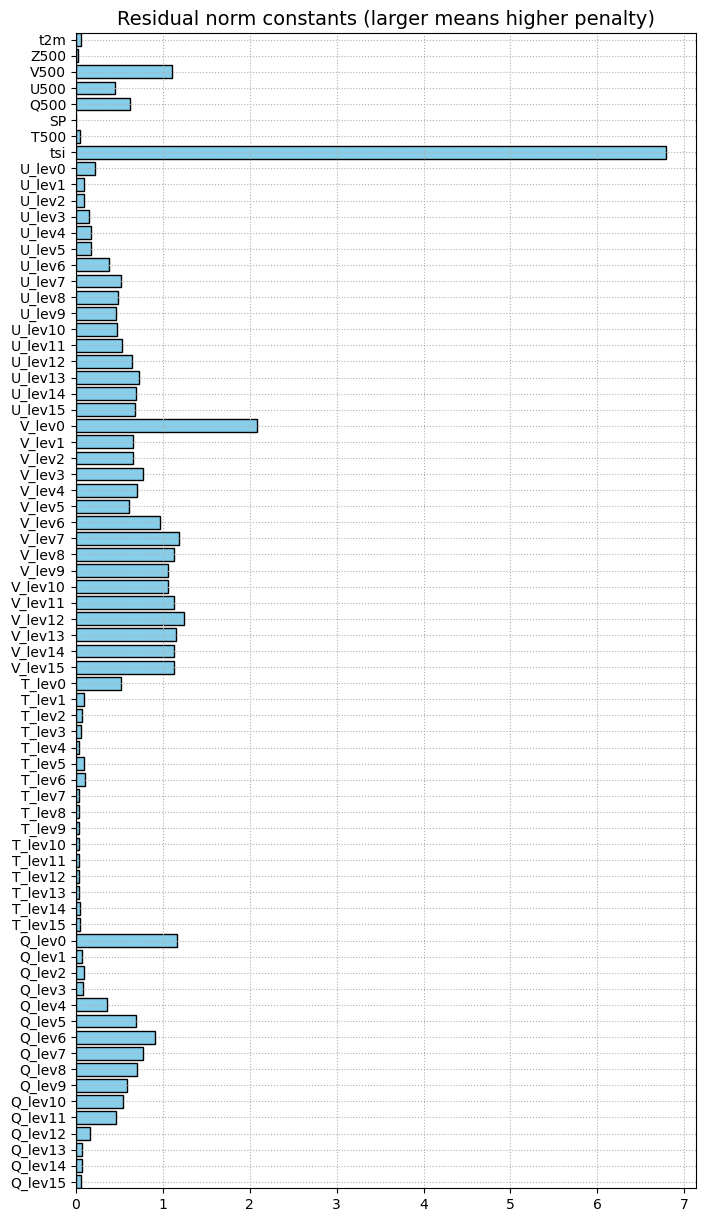

In [13]:
fig = plt.figure(figsize=(8, 15))
ax = fig.gca()
ax.grid(linestyle=':')
ax.barh(varname_plot[::-1], residual_vals[::-1], color='skyblue', edgecolor='k')
plt.autoscale(enable=True, axis='y', tight=True)
ax.set_title('Residual norm constants (larger means higher penalty)', fontsize=14)